1. 데이터 가공

1-1. 데이터 읽어와서 확인

In [17]:
from glob import glob
import pandas as pd
datalist = r"C:\Users\bluecom014\Desktop\data\csv 파일\행복지수\*.xlsx"

files = glob(datalist)

filenames = {}
for idx, name in enumerate(files):
    filenames[name.split('_')[1].split('.')[0]] = [idx]
filenames

{'건강': [0],
 '경제': [1],
 '관계 및 사회참여': [2],
 '교육': [3],
 '삶의만족도': [4],
 '안전': [5],
 '여가': [6],
 '환경': [7]}

In [18]:
def make_happy_element(word):
    happy_element = pd.read_excel(files[filenames[word][0]])
    filenames[word].append(happy_element)

for name in filenames:
    make_happy_element(name)

데이터 가공 확인

In [19]:
filenames['삶의만족도'][1].head()

,No,시도,구군,삶의 만족도
0,1,서울특별시,종로구,0.4437
1,2,서울특별시,중구,0.4976
2,3,서울특별시,용산구,0.6161
3,4,서울특별시,성동구,0.4729
4,5,서울특별시,광진구,0.4041


1-2. 데이터 병합

시도 데이터 추출

In [20]:
happy_merge = pd.DataFrame({'시도' : filenames['삶의만족도'][1]['시도'].unique()})
happy_merge

,시도
0,서울특별시
1,부산광역시
2,대구광역시
3,인천광역시
4,광주광역시
5,대전광역시
6,울산광역시
7,세종특별자치시
8,경기도
9,강원도


'삶의 만족도' 데이터 병합

In [21]:
life = filenames['삶의만족도'][1]['삶의 만족도'].groupby(filenames['삶의만족도'][1]['시도']).mean()
happy_merge = pd.merge(happy_merge, life, on='시도')
happy_merge.head()

,시도,삶의 만족도
0,서울특별시,0.490972
1,부산광역시,0.362081
2,대구광역시,0.363988
3,인천광역시,0.411480
4,광주광역시,0.484480


건강, 안전, 환경, 경제, 교육, 관계 및 사회참여, 여가의 평균 데이터 병합

In [22]:
def element_avg_merge(happy_merge, happy_element, word):
    element = happy_element['평균'].groupby(happy_element['시도']).mean()
    happy_merge = pd.merge(happy_merge, element.rename(word), on='시도')
    return happy_merge

In [23]:
for name in filenames:
    if name != '삶의만족도':
        happy_merge = element_avg_merge(happy_merge, filenames[name][1], name)

In [24]:
happy_merge.head()

,시도,삶의 만족도,건강,경제,관계 및 사회참여,교육,안전,여가,환경
0,서울특별시,0.490972,0.569532,0.532820,0.390656,0.399412,0.552256,0.286732,0.470712
1,부산광역시,0.362081,0.511906,0.438038,0.294719,0.504594,0.404875,0.153587,0.448719
2,대구광역시,0.363988,0.482325,0.393975,0.407486,0.585838,0.358429,0.234925,0.552500
3,인천광역시,0.411480,0.339620,0.410820,0.504920,0.502920,0.421020,0.244590,0.515020
4,광주광역시,0.484480,0.632300,0.387380,0.637800,0.689680,0.266440,0.454980,0.607480


1-3. 데이터 검산

In [25]:
for name in filenames:
    print('='*50)
    if name != '삶의만족도':
        print(f'데이터 가공 후의 {name} 평균은 {happy_merge[name].mean()}')
        print(f'데이터 가공 전의 {name} 평균은 {filenames[name][1]['평균'].mean()}')
        print(f'평균 차이는 {abs(happy_merge[name].mean() - filenames[name][1]['평균'].mean())}')
    else:
        print(f'데이터 가공 후의 {name} 평균은 {happy_merge['삶의 만족도'].mean()}')
        print(f'데이터 가공 전의 {name} 평균은 {filenames[name][1]['삶의 만족도'].mean()}')
        print(f'평균 차이는 {abs(happy_merge['삶의 만족도'].mean() - filenames[name][1]['삶의 만족도'].mean())}')

데이터 가공 후의 건강 평균은 0.4094014744072605
데이터 가공 전의 건강 평균은 0.40443508771929826
평균 차이는 0.004966386687962232
데이터 가공 후의 경제 평균은 0.4076346792607561
데이터 가공 전의 경제 평균은 0.3894403508771929
평균 차이는 0.018194328383563163
데이터 가공 후의 관계 및 사회참여 평균은 0.49763200954204206
데이터 가공 전의 관계 및 사회참여 평균은 0.468419298245614
평균 차이는 0.02921271129642805
데이터 가공 후의 교육 평균은 0.5786529913992841
데이터 가공 전의 교육 평균은 0.5396557017543859
평균 차이는 0.038997289644898125
데이터 가공 후의 삶의만족도 평균은 0.5181887062335198
데이터 가공 전의 삶의만족도 평균은 0.4937618421052632
평균 차이는 0.024426864128256565
데이터 가공 후의 안전 평균은 0.42088164252386323
데이터 가공 전의 안전 평균은 0.4569065789473684
평균 차이는 0.03602493642350518
데이터 가공 후의 여가 평균은 0.46490970955241717
데이터 가공 전의 여가 평균은 0.4623894736842106
평균 차이는 0.0025202358682065995
데이터 가공 후의 환경 평균은 0.5794064414748389
데이터 가공 전의 환경 평균은 0.5806381578947368
평균 차이는 0.0012317164198979436


happy_merge 데이터 프레임을 csv 파일로 저장

In [35]:
happy_merge.to_csv('happy.csv')

데이터 결손 확인

In [26]:
happy_merge.isnull().sum()

시도           0
삶의 만족도       0
건강           0
경제           0
관계 및 사회참여    0
교육           0
안전           0
여가           0
환경           0
dtype: int64

2. 데이터 분석 및 시각화

2-1. 데이터 분석

데이터 집계 내용 확인

In [27]:
happy_merge.describe()

,삶의 만족도,건강,경제,관계 및 사회참여,교육,안전,여가,환경
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.518189,0.409401,0.407635,0.497632,0.578653,0.420882,0.464910,0.579406
std,0.138257,0.127636,0.111265,0.114394,0.125408,0.123557,0.176206,0.097299
min,0.362081,0.232000,0.196543,0.294719,0.399412,0.157800,0.153587,0.393440
25%,0.411480,0.329506,0.386861,0.402183,0.488533,0.358429,0.347960,0.515020
50%,0.490972,0.401064,0.410820,0.487464,0.587000,0.446100,0.454980,0.582380
75%,0.553100,0.482325,0.468926,0.601532,0.648047,0.484835,0.632750,0.652400
max,0.907700,0.663580,0.642580,0.676440,0.840780,0.573155,0.702891,0.735600


행복지수 요소별 평균 확인

In [28]:
happy_merge.iloc[:,1:].mean()

삶의 만족도       0.518189
건강           0.409401
경제           0.407635
관계 및 사회참여    0.497632
교육           0.578653
안전           0.420882
여가           0.464910
환경           0.579406
dtype: float64

시도별 평균 확인

In [29]:
happy_merge.set_index('시도').mean(axis=1)

시도
서울특별시      0.461637
부산광역시      0.389815
대구광역시      0.422433
인천광역시      0.418799
광주광역시      0.520068
대전광역시      0.497018
울산광역시      0.532900
세종특별자치시    0.521288
경기도        0.472481
강원도        0.526015
충청북도       0.500400
충청남도       0.508128
전라북도       0.488729
전라남도       0.500111
경상북도       0.436254
경상남도       0.482856
제주특별자치도    0.559075
dtype: float64

행복지수 요소별 상관관계 확인

In [30]:
happy_merge.iloc[:,1:].corr()

,삶의 만족도,건강,경제,관계 및 사회참여,교육,안전,여가,환경
삶의 만족도,1.000000,-0.570466,-0.057815,0.519122,-0.113522,-0.191709,0.497880,0.572262
건강,-0.570466,1.000000,0.071809,-0.175048,0.242186,-0.210138,-0.405151,-0.357841
경제,-0.057815,0.071809,1.000000,0.298562,0.451395,-0.142781,-0.367461,-0.716187
관계 및 사회참여,0.519122,-0.175048,0.298562,1.000000,0.462585,-0.444827,0.216653,0.169838
교육,-0.113522,0.242186,0.451395,0.462585,1.000000,-0.519065,-0.070109,-0.146646
안전,-0.191709,-0.210138,-0.142781,-0.444827,-0.519065,1.000000,0.382730,-0.124581
여가,0.497880,-0.405151,-0.367461,0.216653,-0.070109,0.382730,1.000000,0.494416
환경,0.572262,-0.357841,-0.716187,0.169838,-0.146646,-0.124581,0.494416,1.000000


2-2. 선 그래프로 시각화

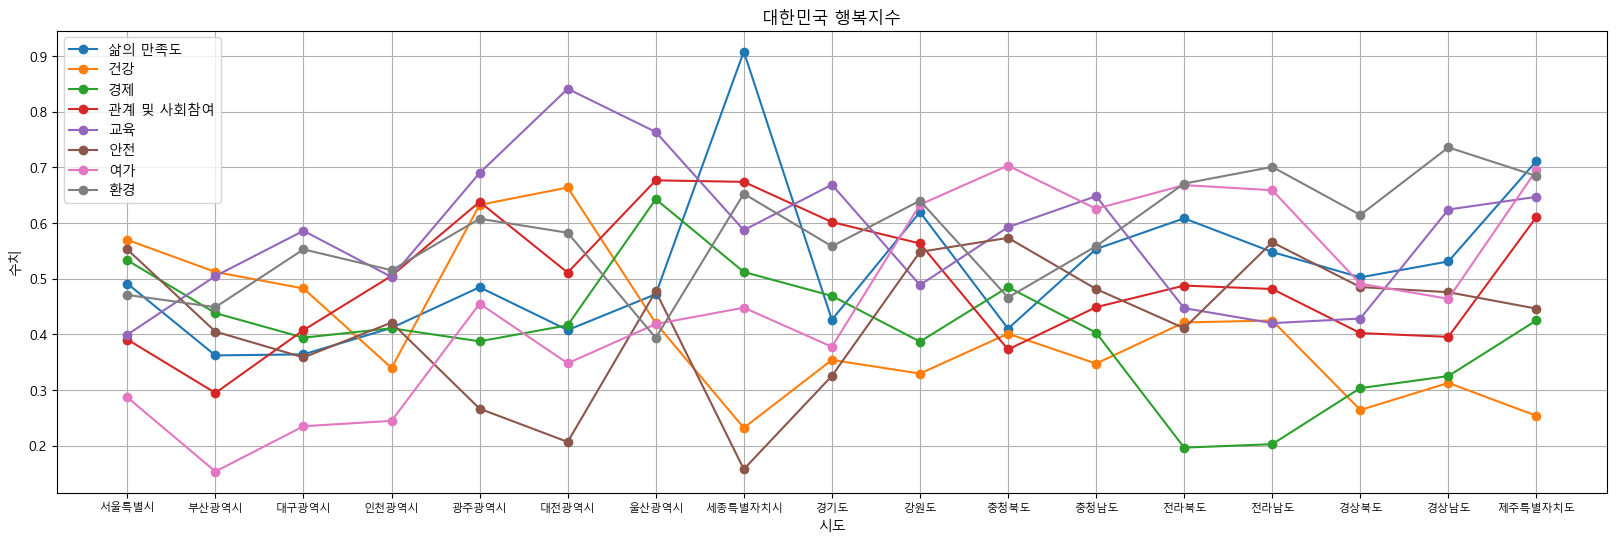

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(20,6))
items = list(happy_merge.columns[1:])
for a in items:
    chartdata = happy_merge[a]
    plt.plot(chartdata, marker='o', label = a)

plt.xlabel('시도')
plt.ylabel('수치')
plt.xticks(range(len(happy_merge['시도'])), happy_merge['시도'], fontsize=8)
plt.title('대한민국 행복지수')
plt.legend()
plt.grid()
plt.show()

2-3. 막대 그래프로 시각화

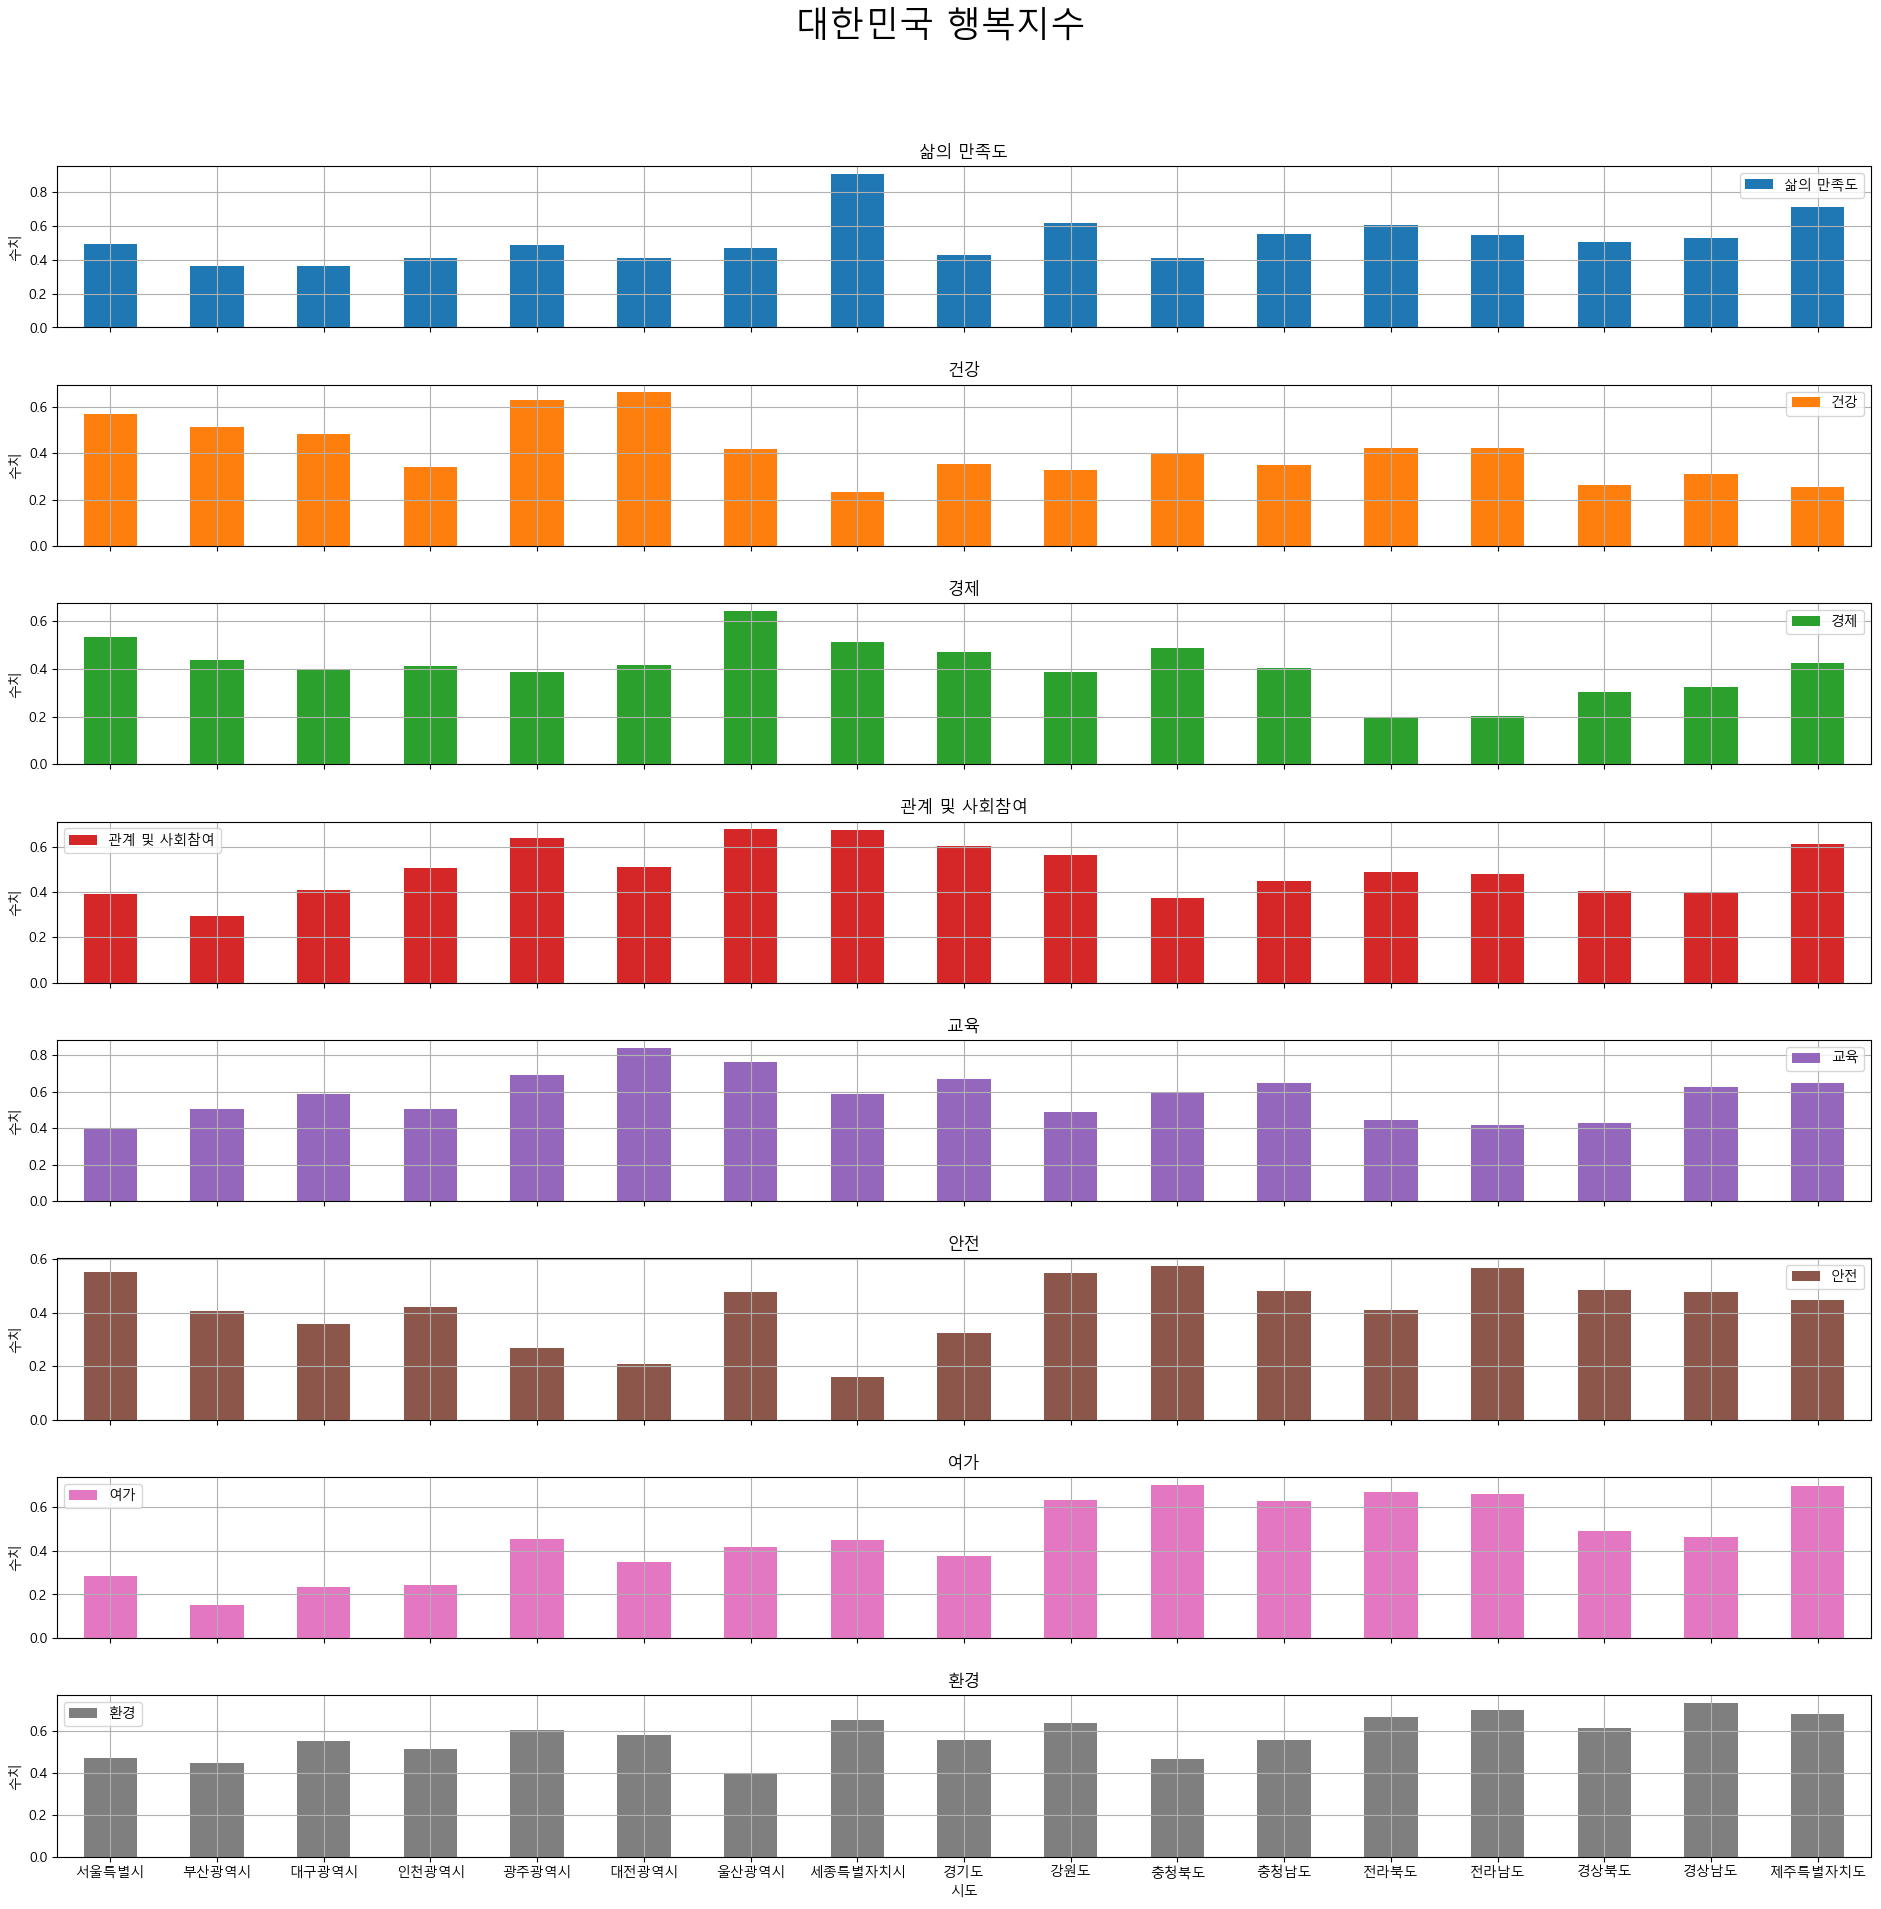

In [32]:
import numpy as np

happy_merge.plot(kind='bar', xlabel='시도', ylabel='수치', figsize=(20,20), grid=True, subplots=True)

plt.suptitle('대한민국 행복지수', fontsize=25)
plt.tight_layout(pad=5, h_pad=2)
plt.xticks(np.arange(len(happy_merge['시도'])), happy_merge['시도'], rotation=360)
plt.show()

2-4. 히트맵 그래프로 시각화

triu() : 상삼각행렬

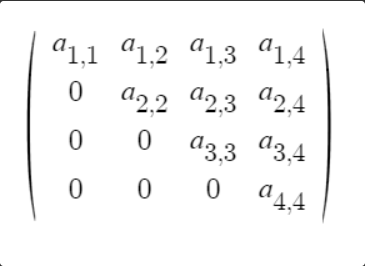

tril() : 하삼각행렬

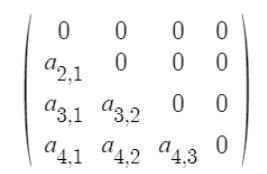

- corr()는 상관 계수를 구하는데 대각선을 기준으로 대칭을 이룬다

- heatmap() 그래프 출력
  1. 상관계수인 correlation_mat을 히트맵 그래프로 출력한다.
  2. mask를 사용해서 상삼각행렬인 upp_mat를 마스킹하여 하삼각행렬만 출력하도록 한다.
  3. annot를 사용해서 각 셀마다 수치를 출력
  4. cmap을 사용해서 색상 지정 Red - Yellow - Green

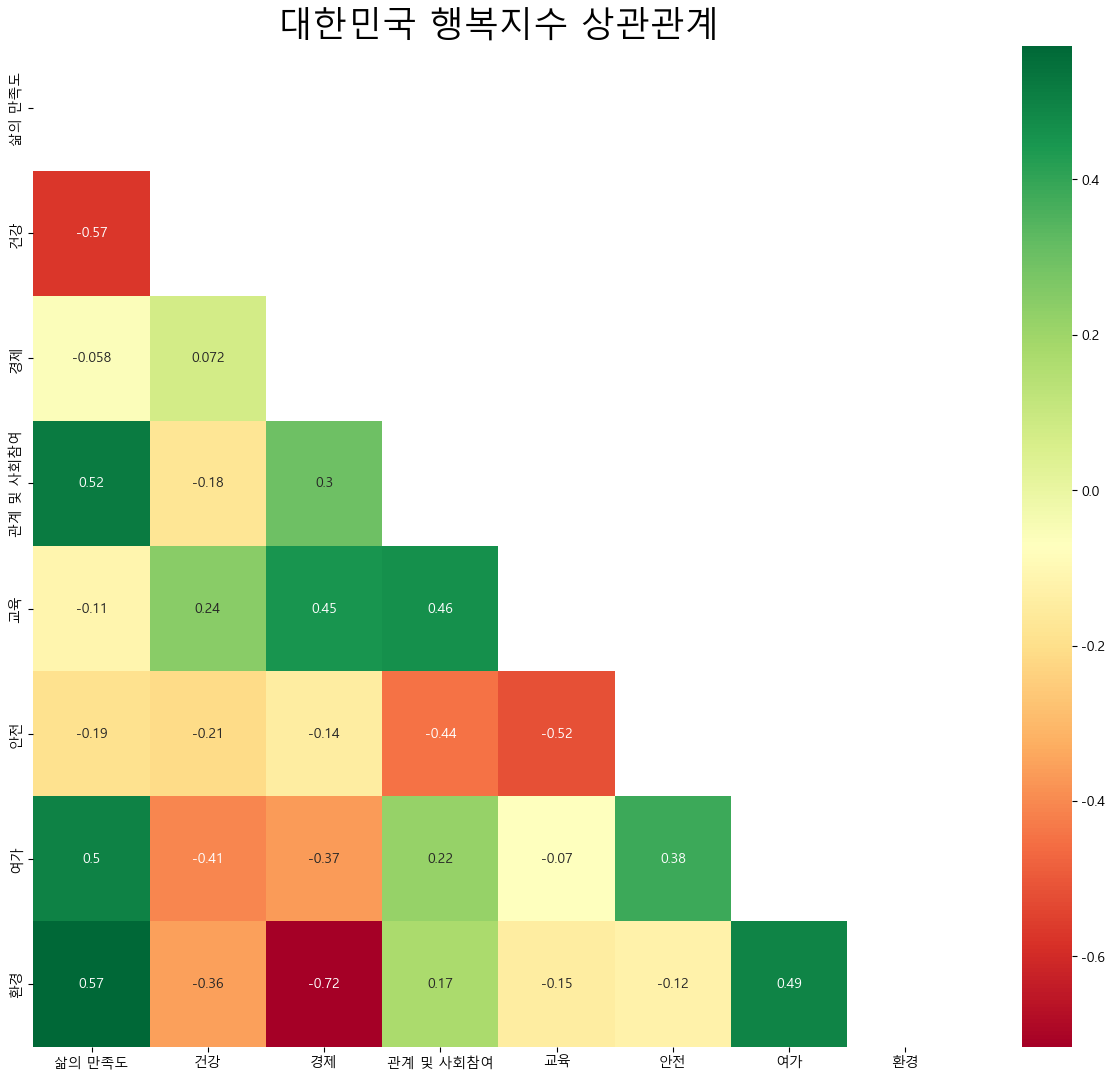

In [33]:
plt.figure(figsize = (15, 13))
plt.title('대한민국 행복지수 상관관계', fontsize = 25)
plt.rcParams['axes.unicode_minus'] = False  # '- (마이너스)' 출력하기

correlation_mat = happy_merge.iloc[:, 1:].corr()
upp_mat = np.triu(correlation_mat)
sns.heatmap(correlation_mat, mask=upp_mat, annot=True, cmap='RdYlGn')
plt.show()